In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

## Load data

In [2]:
train_data = pd.read_csv('train.csv')
train_data.head()

,Password,Times
0,631XniVx2lS5I,2
1,LEGIT747,1
2,742364es,1
3,3846696477,1
4,laurahop,2


In [3]:
test_data = pd.read_csv('Xtest.csv', index_col = 'Id')
test_data.head()

/Users/konstantinsobolev/anaconda2/envs/py36/lib/python3.6/site-packages/numpy/lib/arraysetops.py:568: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,Password
Id,
0,ThaisCunha
1,697775113
2,922a16922a
3,andy74
4,joemack


## EDA

In [4]:
train_data.sort_values(by = 'Times', ascending = False).head(30)

,Password,Times
2715397,123456,55893
3136279,qwerty,13137
1175081,123456789,11696
2363307,12345,10938
2988373,1234,6432
2307329,111111,5682
3348280,1234567,4796
1795496,dragon,3927
3336606,123123,3845
3798071,baseball,3565


In [5]:
train_data.shape, test_data.shape

((4151496, 2), (1037875, 1))

In [6]:
test_passwords_list = test_data.Password.values

In [7]:
# пересечений паролей не наблюдается
train_data.loc[train_data.Password.isin(test_passwords_list)]

,Password,Times
66233,NaN,27
157331,NaN,3


In [8]:
test_data[test_data.Password == np.nan]

,Password
Id,


In [9]:
test_data[test_data.isna().any(axis=1)]

,Password
Id,
581317,NaN


In [10]:
import re
lower_match = re.search(r'[a-z]', 'qwe')

In [11]:
lower_match

<_sre.SRE_Match object; span=(0, 1), match='q'>

## Feature generation

In [12]:
from password_strength import PasswordStats, tests

def get_n_unique_chars(string):
    return len(list(set(str(string))))

def count_upper_chars(string):
    return sum(1 for c in str(string) if c.isupper())

def count_lower_chars(string):
    return sum(1 for c in str(string) if c.islower())

def repeated_patterns_length(string):
    stats = PasswordStats(str(string))
    return stats.repeated_patterns_length

def sequences_length(string):
    stats = PasswordStats(str(string))
    return stats.sequences_length

def n_special_characters(string):
    stats = PasswordStats(str(string))
    return stats.special_characters

def weakness_factor(string):
    stats = PasswordStats(str(string))
    return stats.weakness_factor

def alphabet_cardinality(string):
    stats = PasswordStats(str(string))
    return stats.alphabet_cardinality

In [13]:
def generate_features(df):
    
    df['len'] = df.Password.str.len()
    df['n_unique'] = df.Password.apply(get_n_unique_chars)
    df['upper_chars'] = df.Password.apply(count_upper_chars)
    df['lower_chars'] = df.Password.apply(count_lower_chars)
    
    df['repeated_patterns_length'] = df.Password.apply(repeated_patterns_length)
    df['sequences_length'] = df.Password.apply(sequences_length)
    df['n_special_characters'] = df.Password.apply(n_special_characters)
    df['weakness_factor'] = df.Password.apply(weakness_factor)
    df['alphabet_cardinality'] = df.Password.apply(alphabet_cardinality)
    
    df['n_numbers'] = df['len'] - df['n_special_characters'] - df['lower_chars']
    
    df['has_numbers'] = (df['n_numbers'] > 0).astype(int)
    df['has_upper_chars'] = (df['upper_chars'] > 0).astype(int)
    df['has_lower_chars'] = (df['lower_chars'] > 0).astype(int)
    df['has_special_characters'] = (df['n_special_characters'] > 0).astype(int)
    
    df['entropy'] = np.log2(df['has_upper_chars'] * 26 + df['has_lower_chars'] * 26 + df['has_numbers'] * 10
                           + df['has_special_characters'] * 14) * df['len']
    
    df['strength'] = (1 - df['weakness_factor']) * df['entropy']
    
    

In [14]:
generate_features(train_data)
train_data.head()

,Password,Times,len,n_unique,upper_chars,lower_chars,repeated_patterns_length,sequences_length,n_special_characters,weakness_factor,alphabet_cardinality,n_numbers,has_numbers,has_upper_chars,has_lower_chars,has_special_characters,entropy,strength
0,631XniVx2lS5I,2,13.0,13,4,4,0,0,0,0.0,13,9.0,1,1,1,0,77.404552,77.404552
1,LEGIT747,1,8.0,7,5,0,0,0,0,0.0,7,8.0,1,1,0,0,41.359400,41.359400
2,742364es,1,8.0,7,0,2,0,0,0,0.0,7,6.0,1,0,1,0,41.359400,41.359400
3,3846696477,1,10.0,6,0,0,4,0,0,0.4,6,10.0,1,0,0,0,33.219281,19.931569
4,laurahop,2,8.0,7,0,8,0,0,0,0.0,7,0.0,0,0,1,0,37.603518,37.603518


In [15]:
generate_features(test_data)
test_data.head()

,Password,len,n_unique,upper_chars,lower_chars,repeated_patterns_length,sequences_length,n_special_characters,weakness_factor,alphabet_cardinality,n_numbers,has_numbers,has_upper_chars,has_lower_chars,has_special_characters,entropy,strength
Id,,,,,,,,,,,,,,,,,
0,ThaisCunha,10.0,8,2,8,0,0,0,0.000000,8,2.0,1,1,1,0,59.541963,59.541963
1,697775113,9.0,6,0,0,5,0,0,0.555556,6,9.0,1,0,0,0,29.897353,13.287712
2,922a16922a,10.0,5,0,2,4,0,0,0.400000,5,8.0,1,0,1,0,51.699250,31.019550
3,andy74,6.0,6,0,4,0,0,0,0.000000,6,2.0,1,0,1,0,31.019550,31.019550
4,joemack,7.0,7,0,7,0,0,0,0.000000,7,0.0,0,0,1,0,32.903078,32.903078


## Model 

In [16]:
train_data[train_data.isna().any(axis=1)]

,Password,Times,len,n_unique,upper_chars,lower_chars,repeated_patterns_length,sequences_length,n_special_characters,weakness_factor,alphabet_cardinality,n_numbers,has_numbers,has_upper_chars,has_lower_chars,has_special_characters,entropy,strength
66233,NaN,27,NaN,2,0,3,0,0,0,0.0,2,NaN,0,0,1,0,NaN,NaN
157331,NaN,3,NaN,2,0,3,0,0,0,0.0,2,NaN,0,0,1,0,NaN,NaN


In [17]:
train_data.head()

,Password,Times,len,n_unique,upper_chars,lower_chars,repeated_patterns_length,sequences_length,n_special_characters,weakness_factor,alphabet_cardinality,n_numbers,has_numbers,has_upper_chars,has_lower_chars,has_special_characters,entropy,strength
0,631XniVx2lS5I,2,13.0,13,4,4,0,0,0,0.0,13,9.0,1,1,1,0,77.404552,77.404552
1,LEGIT747,1,8.0,7,5,0,0,0,0,0.0,7,8.0,1,1,0,0,41.359400,41.359400
2,742364es,1,8.0,7,0,2,0,0,0,0.0,7,6.0,1,0,1,0,41.359400,41.359400
3,3846696477,1,10.0,6,0,0,4,0,0,0.4,6,10.0,1,0,0,0,33.219281,19.931569
4,laurahop,2,8.0,7,0,8,0,0,0,0.0,7,0.0,0,0,1,0,37.603518,37.603518


In [18]:
train_data.drop(['Password'], axis=1).corr()

,Times,len,n_unique,upper_chars,lower_chars,repeated_patterns_length,sequences_length,n_special_characters,weakness_factor,alphabet_cardinality,n_numbers,has_numbers,has_upper_chars,has_lower_chars,has_special_characters,entropy,strength
Times,1.000000,-0.017525,-0.017918,-0.008054,-0.005296,-0.000247,0.006514,-0.003161,0.008291,-0.017918,-0.007892,-0.016747,-0.009716,-0.010428,-0.003716,-0.021764,-0.020083
len,-0.017525,1.000000,0.783504,0.080700,0.518699,0.199429,0.140783,0.159984,0.043843,0.783504,0.204000,0.039211,0.039111,0.147990,0.171711,0.918053,0.680476
n_unique,-0.017918,0.783504,1.000000,0.182620,0.486142,-0.231661,0.129657,0.118255,-0.291772,1.000000,0.069089,0.091446,0.167873,0.302446,0.146471,0.826089,0.815421
upper_chars,-0.008054,0.080700,0.182620,1.000000,-0.245381,-0.066274,-0.062936,0.015956,-0.100929,0.182620,0.344866,0.207956,0.777168,-0.182781,0.013684,0.228477,0.251560
lower_chars,-0.005296,0.518699,0.486142,-0.245381,1.000000,-0.048317,-0.032020,0.065464,-0.162244,0.486142,-0.729225,-0.540212,-0.190168,0.635668,0.093679,0.551771,0.512150
repeated_patterns_length,-0.000247,0.199429,-0.231661,-0.066274,-0.048317,1.000000,0.026192,0.033127,0.825492,-0.231661,0.214218,0.071543,-0.079310,-0.125844,0.010518,0.113413,-0.429759
sequences_length,0.006514,0.140783,0.129657,-0.062936,-0.032020,0.026192,1.000000,0.005471,0.457288,0.129657,0.150042,0.071173,-0.058103,-0.038572,0.004459,0.099437,-0.229771
n_special_characters,-0.003161,0.159984,0.118255,0.015956,0.065464,0.033127,0.005471,1.000000,0.002567,0.118255,-0.013081,-0.021862,0.021388,0.008422,0.868372,0.192593,0.148822
weakness_factor,0.008291,0.043843,-0.291772,-0.100929,-0.162244,0.825492,0.457288,0.002567,1.000000,-0.291772,0.220871,0.097536,-0.108187,-0.176886,-0.015449,-0.037255,-0.608278
alphabet_cardinality,-0.017918,0.783504,1.000000,0.182620,0.486142,-0.231661,0.129657,0.118255,-0.291772,1.000000,0.069089,0.091446,0.167873,0.302446,0.146471,0.826089,0.815421


In [19]:
train_data.dropna(inplace = True)
test_data.fillna(value=15, inplace = True)

In [20]:
y = train_data['Times'].values
y_bin = (y == 1).astype(int)
y_reg = np.log(y + 1)

feature_names = train_data.drop(['Password', 'Times', 'repeated_patterns_length', 'lower_chars', 
                     'n_special_characters', 'has_special_characters', 'has_lower_chars',
                                'has_upper_chars'], axis=1).columns.values
X = train_data[feature_names].values
X_test = test_data[feature_names].values

In [21]:
feature_names

array(['len', 'n_unique', 'upper_chars', 'sequences_length',
       'weakness_factor', 'alphabet_cardinality', 'n_numbers',
       'has_numbers', 'entropy', 'strength'], dtype=object)

In [22]:
y_bin.mean()

0.8544285503002051

In [23]:
X_test.shape

(1037875, 10)

In [25]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import mean_squared_log_error
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score
import lightgbm as lgb
from catboost import CatBoostRegressor


# scaler = StandardScaler()
# X = scaler.fit_transform(X)
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
kf.get_n_splits(X)

5

In [26]:
const = 1
a = np.array([1] * len(y))
a[y > const] = np.mean(y[y > const])
b = np.array([1] * len(y))
b[y > const] = np.median(y[y > const])
c = np.array([np.exp(np.log(y + 1).mean()) - 1] * len(y))
d = np.array([y.mean()] * len(y))

In [27]:
print(np.sqrt(mean_squared_log_error(y, np.array([1] * len(y)))))
print(np.sqrt(mean_squared_log_error(y, a)))
print(np.sqrt(mean_squared_log_error(y, b)))
print(np.sqrt(mean_squared_log_error(y, c)))
print(np.sqrt(mean_squared_log_error(y, d)))

0.4277741053505981
0.3423952684150304
0.3253699941198235
0.40921974436881037
0.48192755082561833


In [28]:
np.mean(y[y > 1])

7.334527475473203

In [29]:
a[y > 1] = np.mean(y[y > 1])

In [30]:
train_data.head()

,Password,Times,len,n_unique,upper_chars,lower_chars,repeated_patterns_length,sequences_length,n_special_characters,weakness_factor,alphabet_cardinality,n_numbers,has_numbers,has_upper_chars,has_lower_chars,has_special_characters,entropy,strength
0,631XniVx2lS5I,2,13.0,13,4,4,0,0,0,0.0,13,9.0,1,1,1,0,77.404552,77.404552
1,LEGIT747,1,8.0,7,5,0,0,0,0,0.0,7,8.0,1,1,0,0,41.359400,41.359400
2,742364es,1,8.0,7,0,2,0,0,0,0.0,7,6.0,1,0,1,0,41.359400,41.359400
3,3846696477,1,10.0,6,0,0,4,0,0,0.4,6,10.0,1,0,0,0,33.219281,19.931569
4,laurahop,2,8.0,7,0,8,0,0,0,0.0,7,0.0,0,0,1,0,37.603518,37.603518


In [31]:
cat_cols = [i for i in range(X.shape[1] - 2) if i not in [7, 0, 9, 4]]

In [32]:
# pred_test = np.array([0.0] * test_data.shape[0])
# proba_test = np.array([0.0] * test_data.shape[0])


# for train_index, test_index in kf.split(X, y_bin):
#     X_train, X_val = X[train_index], X[test_index]
#     y_train_reg, y_val_reg = y_reg[train_index], y_reg[test_index]
#     y_train_clf, y_val_clf = y_bin[train_index], y_bin[test_index]
    




#     clf = lgb.LGBMClassifier(num_leaves=31, max_depth=-1, learning_rate=0.1, n_estimators=250,
#                             subsample=0.8, subsample_freq=0, colsample_bytree=0.8)
#     clf.fit(X_train, y_train_clf)
#     y_val_clf_proba = clf.predict_proba(X_val)[:, 1]
#     y_val_clf_pred = (y_val_clf_proba > np.quantile(y_val_clf_proba, 0.6)).astype(int)
#     y_val_clf_pred =  clf.predict(X_val)


#     model = RandomForestRegressor(n_estimators=100,verbose=1,n_jobs=-1)
#     model.fit(X_train, y_train_reg)
#     predictions = model.predict(X_val)
#     predictions[predictions < np.log(2)] = np.log(2)
    
    
#     d_train = lgb.Dataset(X_train, label=y_train_reg)
#     d_valid = lgb.Dataset(X_val, label=y_val_reg, reference=d_train)
#     watchlist = [d_train, d_valid]
#     model = lgb.train(params,
#                 d_train,
#                 num_boost_round=n_estimators,
#                 valid_sets=d_valid,
#                 early_stopping_rounds=15)
#     predictions = model.predict(X_val)
#     predictions[predictions < np.log(2)] = np.log(2)
#     predictions[y_val_clf_proba > np.quantile(y_val_clf_proba, 0.95)] = np.log(2)

    
#     model = CatBoostRegressor(iterations=100,
#                               learning_rate=0.1,
#                               depth=7, cat_features = cat_cols)
    
#     model.fit(X_train, y_train_reg)
#     predictions = model.predict(X_val)
#     predictions[predictions < np.log(2)] = 0
#     predictions[y_val_clf_proba > np.quantile(y_val_clf_proba, 0.8)] = np.log(2)

#     print(np.sqrt(mean_squared_log_error(np.exp(y_val_reg) - 1, np.exp(predictions) - 1)))
# #     print(roc_auc_score(y_val_clf, clf.predict_proba(X_val)[:, 1]), 
# #           accuracy_score(y_val_clf, clf.predict(X_val)),
# #           precision_score(y_val_clf, y_val_clf_pred),
# #          recall_score(y_val_clf, y_val_clf_pred))
# #     proba_test += clf.predict_proba(X_test)[:, 1] / kf.get_n_splits(X)
#     pred_test += (np.exp(model.predict(X_test)) - 1)/ kf.get_n_splits(X)
    


In [33]:
pred_test = np.array([0.0] * test_data.shape[0])

model = CatBoostRegressor(iterations=50,
                              learning_rate=0.3,
                              depth=7, cat_features = [])
    
model.fit(X, y_reg)
pred_test_final = np.exp(model.predict(X_test)) - 1

0:	learn: 0.6990459	total: 1.45s	remaining: 1m 11s
1:	learn: 0.5637815	total: 2.35s	remaining: 56.5s
2:	learn: 0.4827821	total: 3.1s	remaining: 48.6s
3:	learn: 0.4376883	total: 3.79s	remaining: 43.5s
4:	learn: 0.4135254	total: 4.38s	remaining: 39.4s
5:	learn: 0.4009653	total: 5.06s	remaining: 37.1s
6:	learn: 0.3945028	total: 5.74s	remaining: 35.2s
7:	learn: 0.3911167	total: 6.37s	remaining: 33.4s
8:	learn: 0.3893319	total: 7.03s	remaining: 32s
9:	learn: 0.3884246	total: 7.63s	remaining: 30.5s
10:	learn: 0.3878199	total: 8.26s	remaining: 29.3s
11:	learn: 0.3875008	total: 8.9s	remaining: 28.2s
12:	learn: 0.3872942	total: 9.53s	remaining: 27.1s
13:	learn: 0.3871047	total: 10.1s	remaining: 26s
14:	learn: 0.3869605	total: 10.7s	remaining: 25s
15:	learn: 0.3868557	total: 11.3s	remaining: 24s
16:	learn: 0.3867736	total: 11.9s	remaining: 23s
17:	learn: 0.3866643	total: 12.4s	remaining: 22.1s
18:	learn: 0.3865866	total: 13s	remaining: 21.2s
19:	learn: 0.3865163	total: 13.5s	remaining: 20.2s
20:

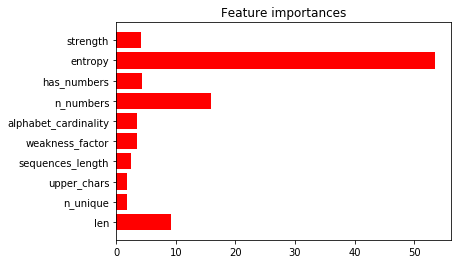

In [34]:
plt.figure()
plt.title("Feature importances")
plt.barh(feature_names,
         model.feature_importances_,
       color="r", align="center")
# If you want to define your own labels,
# change indices to a list of labels on the following line.
plt.show()

## Submission

In [35]:
sample_submission = pd.read_csv('sample_submission.csv', index_col = 'Id')

/Users/konstantinsobolev/anaconda2/envs/py36/lib/python3.6/site-packages/numpy/lib/arraysetops.py:568: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [36]:
submission = test_data.loc[:, ['Password', 'len']]
submission['Times'] = pred_test_final
# submission.loc[test_data.Password.isin(['789', 'asd', 'password', '12345678', 'iloveyou', 
#                                    'admin', 'welcome', 'monkey', 'charlie', 'trustno1']), 'Times'] = 5682
# submission.loc[submission['Times'] < 1, 'Times'] = 1.0

In [37]:
submission.drop(['Password', 'len'], axis = 1).to_csv('submission.csv')

In [38]:
submission.drop(['Password', 'len'], axis = 1)['Times'].describe()

count    1.037875e+06
mean     1.295819e+00
std      1.619226e+00
min      3.968229e-01
25%      1.069759e+00
50%      1.187308e+00
75%      1.395274e+00
max      7.850261e+02
Name: Times, dtype: float64

In [39]:
sample_submission

,Times
Id,
0,1.922133
1,1.922133
2,1.922133
3,1.922133
4,1.922133
5,1.922133
6,1.922133
7,1.922133
8,1.922133
